<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объявлений-о-продаже-квартир" data-toc-modified-id="Исследование-объявлений-о-продаже-квартир-1">Исследование объявлений о продаже квартир</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1.1">Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1">Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2">Предобработка данных</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2">Вывод</a></span><ul class="toc-item"><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-2.1">Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2.2">Исследовательский анализ данных</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3">Вывод</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4">Факторы, влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1">Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5">Вывод</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5.1">Общий вывод</a></span></li></ul></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Я.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('D://Игорь/projects/real_estate_data.csv', sep='\t')
display(df.head())
print('Количество дупликатов :', df.duplicated().sum())
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Количество дупликатов : 0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
print('Уникальные цены', df['last_price'].unique())
print('Уникальные площади квартиры', df['total_area'].unique())
print('Уникальные даты публикации', df['first_day_exposition'].unique())
print('Уникальные комнаты', df['rooms'].unique())
print('Уникальные высоты', df['ceiling_height'].unique())
print('Уникальные жилы', df['living_area'].unique())
print('Уникальное количество этажей', df['floor'].unique())
print('Уникальное наличие балконов', df['balcony'].unique())
print('Уникальные населенные пункты', df['locality_name'].unique())
print('Уникальные расстояние до центра', df['cityCenters_nearest'].unique())
print('Уникальные срок публикации', df['days_exposition'].unique())
#площадь, цена, число комнат, высота потолков

Уникальные цены [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
Уникальные площади квартиры [108.    40.4   56.   ...  66.86 133.81  76.75]
Уникальные даты публикации ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
Уникальные комнаты [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
Уникальные высоты [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

## Предобработка данных

In [5]:
#приводим в корректный вид/тип столбец с датой публикации
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#в пропущенных значениях балкона заменим их на 0
df['balcony'] = df['balcony'].fillna(value=0)

In [8]:
#пропущенных значений где отсутсчтвует количество этажей и назнания населенных прунктов незначительны, по этому мы можем их удалить
df.dropna(subset=['floors_total'], inplace=True)
df.dropna(subset=['locality_name'], inplace=True)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [10]:
#перевродим в целочисленные:
df['total_images'] = df['total_images'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
#df['days_exposition'] = df['days_exposition'].astype(int)
df['last_price'] = df['last_price'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3

In [11]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [12]:
print(df['is_apartment'].value_counts())
#разберемся со столбцом "это не жилдое помещение", всего 50 значений True, 2710 false и остальные nan. заменим nan на false
df['is_apartment'] = df['is_apartment'].fillna(value=False)


False    2710
True       50
Name: is_apartment, dtype: int64


In [13]:
#заменяем пустые значения в числе водоемов и парков на 0 и переводим в целочисленные
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [14]:
#заменяем пустые значения балконов на медианноен значение всего датасета
df['ceiling_height'] = df.groupby(['floors_total', 'locality_name'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
df.isnull().sum()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [15]:
living_ratio = df['living_area'].median() / df['total_area'].median()
kitchen_ratio = df['kitchen_area'].median() / df['total_area'].median()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)
df.isnull().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           8030 non-null float64
ponds_around3000

# Вывод

В Датафрейме 22 столбца и 23699 строк
Скорректировал столбцы:
first_day_exposition - перевел в формат даты/времени
balcony - заменил пустые значения 0, т.к. логичнее всего, что люди не указали наличие балкона в связи с его отсутствием
floors_total
locality_name - в данных столбцах было менее 200 пропущенных значений, на датафрейм не повлияет, по этому удалил
total_images floors_total balcony days_exposition last_price - перевел в целочисленные, т.к. не целых значений в этих столбцах быть не может. За исключением цены, однако на практике не встречается цена квартиры с копейками.
is_apartment - всего 50 значений True, из этого следует что остальные значения False, т.е. остальное не апартаменты а квартиры.
parks_around3000, ponds_around3000 - заменил пустые значения на 0 и перевел в целочисленные
ceiling_height - заменил на медианное значение

living_area, kitchen_area - заменил медианами исходя из общей площади квартиры

Из этого следует что в датасете большое количество пропущеных значений, вопрос к аналитику который собирал датасет. Но в целом данных достаточно для исследования. 


## Расчёты и добавление результатов в таблицу

In [17]:
# добавим столбец с стоимостью квадратногго метра
df['sm_price'] = df['last_price'] / df['total_area']
df['sm_price'] = df['sm_price'].astype(int)

#добавим столбцы: день, месяц и год публикации
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

#сгруппируем этажи на первый последний и другой.
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1)
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.000000,8,False,...,1,482.0,2,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.650,11,18.600000,1,False,...,0,NaN,0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.600,5,34.300000,4,False,...,1,90.0,2,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.600,14,91.730769,9,False,...,2,84.0,3,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.000000,13,False,...,2,112.0,1,48.0,121.0,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.625,12,14.400000,5,False,...,0,NaN,0,NaN,55.0,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.600,26,10.600000,6,False,...,0,NaN,0,NaN,155.0,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.750,24,41.307692,22,False,...,0,NaN,0,NaN,NaN,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.650,27,15.430000,26,False,...,0,NaN,0,NaN,189.0,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.500,9,43.600000,7,False,...,0,NaN,0,NaN,289.0,88524,6,2,2017,другой


In [18]:
#добавляем столбец с соотношением жилой площади к общей в процентном соотношении
df['living_ratio'] = df['living_area'] / df['total_area'] * 100
df['living_ratio'] = df['living_ratio'].fillna(value=0).astype(int)

#добавляем столбец с соотношением площади кухни к общей в процентном соотношении
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] * 100
df['kitchen_ratio'] = df['kitchen_ratio'].fillna(value=0).astype(int)

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type,living_ratio,kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,47,23
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,NaN,81.0,82920,1,12,2018,первый,46,27
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,61,14
3,0,64900000,159.0,2015-07-24,3,2.60,14,91.730769,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,57,17
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,32,41


## Исследовательский анализ данных

In [19]:
#оставил себе как пример
#np.percentile(df['total_area'], [95, 99])

In [20]:
print('Самые большие площади')
print(df['total_area'].sort_values(ascending=False).head(10))

Самые большие площади
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64


In [21]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

(0, 400)

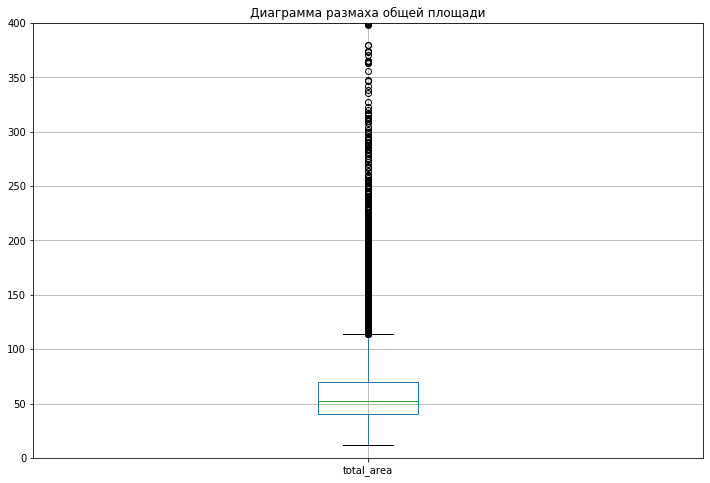

In [22]:
df.boxplot('total_area', figsize=(12,8)).set_title('Диаграмма размаха общей площади')
plt.ylim(0, 400)

In [23]:
#Среднее значение приблизительно 60 квадратных метров, минимальное 12 кв метров (сейчас продаются такие студии)
#и максимальное 900, это не реально т.к. это квартира 30 на 30 метров (в 2 раза больше баскетбольной площадки) скорее всего
# ошибочно

In [24]:
np.percentile(df['total_area'], [99])

array([197.452])

In [1]:
print(df['total_area'].quantile(0.99))

NameError: name 'df' is not defined

AxesSubplot(0.125,0.125;0.775x0.755)


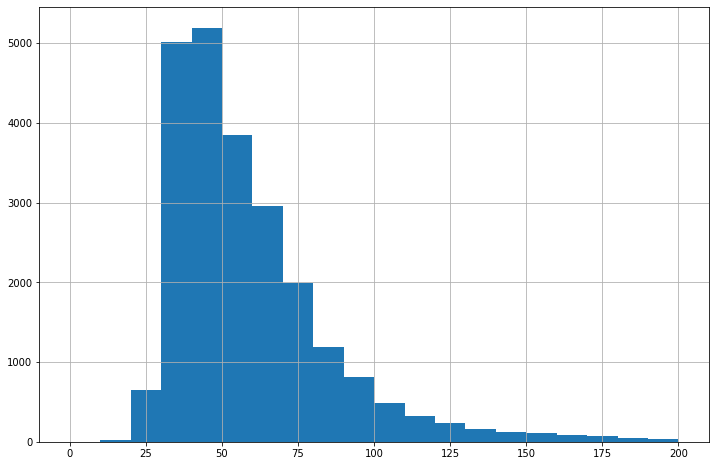

In [26]:
#делаем гистограмму площади. 
print(df['total_area'].hist(bins=20, range = (0, 200), figsize=(12,8))) 

Большинство значений от 30 до 60 кв метров

In [27]:
print('Самые большие цены')
print(df['last_price'].sort_values(ascending=False).head(10))

Самые большие цены
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [28]:
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [29]:
np.percentile(df['last_price'], [99])

array([36000000.])

(0, 36000000)

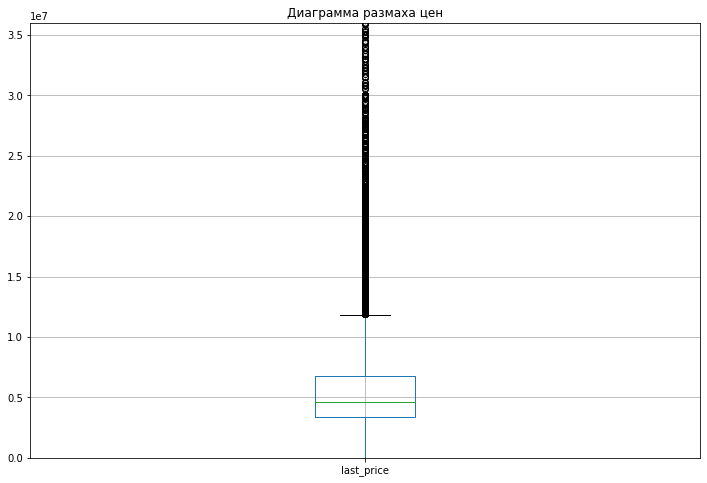

In [30]:
df.boxplot('last_price', figsize=(12,8)).set_title('Диаграмма размаха цен')
plt.ylim(0, 36000000)

Выбросы начинаются от 25млн, но 99й квантиль равент 36млн, по этому будем использовать это ограничение

Text(0.5, 1.0, 'Цена')

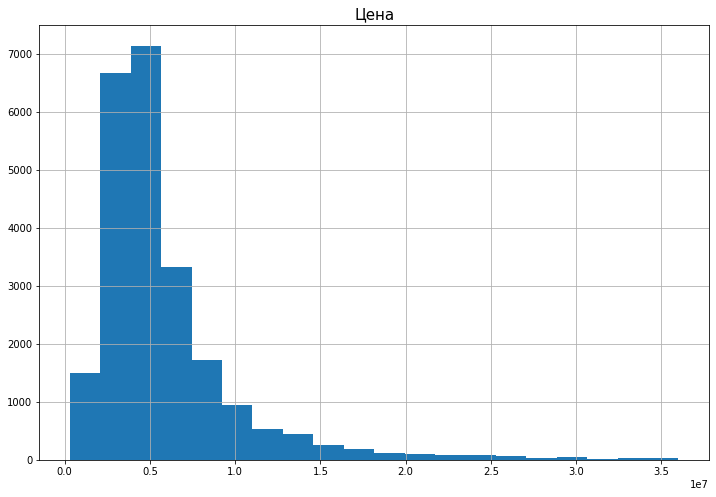

In [31]:
df['last_price'].hist(bins=20, range = (300000, 36000000), figsize=(12,8))
plt.title('Цена', fontsize=15)

По гистаграмме видим что большинство объявлений в диапазоне стоимостей 3-6 млн

In [32]:
print('Самое большое количество комнат')
print(df['rooms'].sort_values(ascending=False).head(10))

Самое большое количество комнат
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
18891    10
Name: rooms, dtype: int64


In [33]:
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [34]:
np.percentile(df['rooms'], [99])

array([5.])

99й квантиль определил значение в 5 комнат, при этом у нас есть значения в 19 комнат, чего не встречается в реальности.

Text(0.5, 1.0, 'Количество комнат')

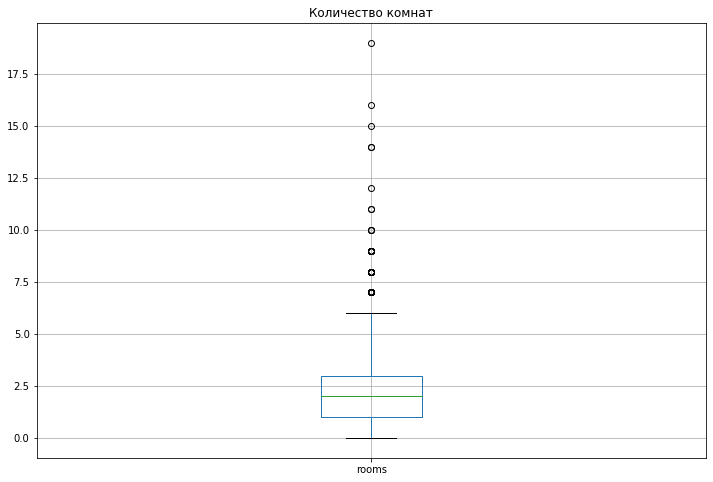

In [35]:
df.boxplot('rooms', figsize=(12,8)).set_title('Количество комнат')

Text(0.5, 1.0, 'Количество комнат')

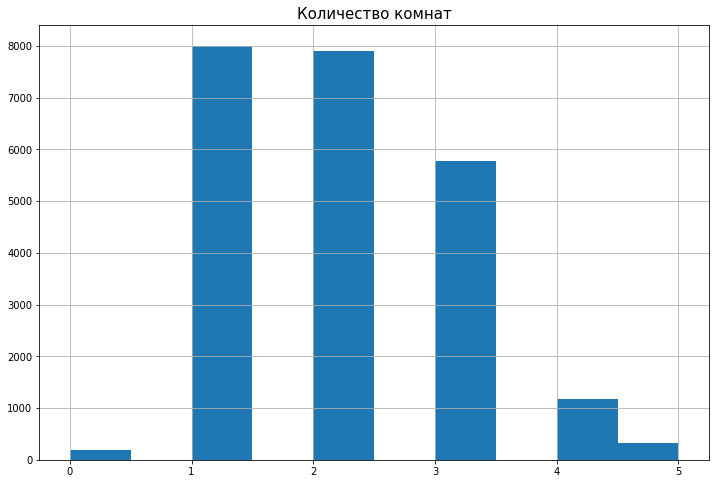

In [36]:
df['rooms'].hist(bins=10, range = (0, 5), figsize=(12,8))
plt.title('Количество комнат', fontsize=15)

Больше всего продают квартир в диапазоне 1-3 комнаты

In [37]:
print('Самые высокие потолки')
print(df['ceiling_height'].sort_values(ascending=False).head(10))

Самые высокие потолки
22869    100.0
3148      32.0
22336     32.0
21377     27.5
5246      27.0
10773     27.0
21824     27.0
5807      27.0
22938     27.0
4876      27.0
Name: ceiling_height, dtype: float64


In [38]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.737873
std          1.009172
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [39]:
np.percentile(df['ceiling_height'], [1,99])

array([2.5, 3.6])

99й квантиль определил значение в 3.6 метра, при этом у нас есть значения в 100, это выброс

Text(0.5, 1.0, 'Высота потолков')

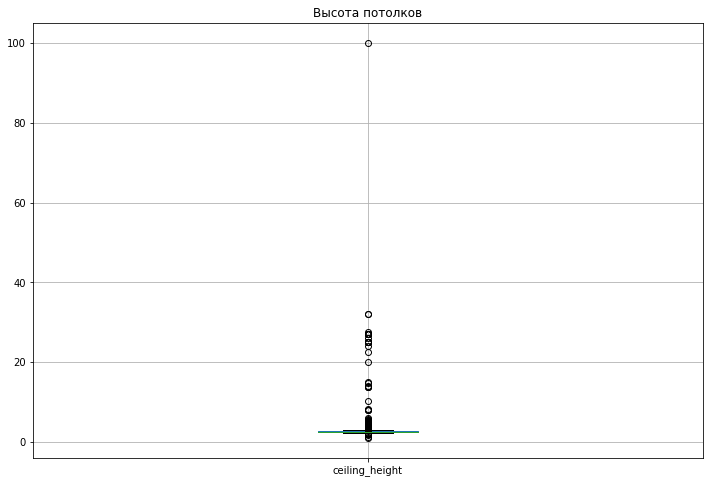

In [40]:
df.boxplot('ceiling_height', figsize=(12,8)).set_title('Высота потолков')

Text(0.5, 1.0, 'Высота потолков')

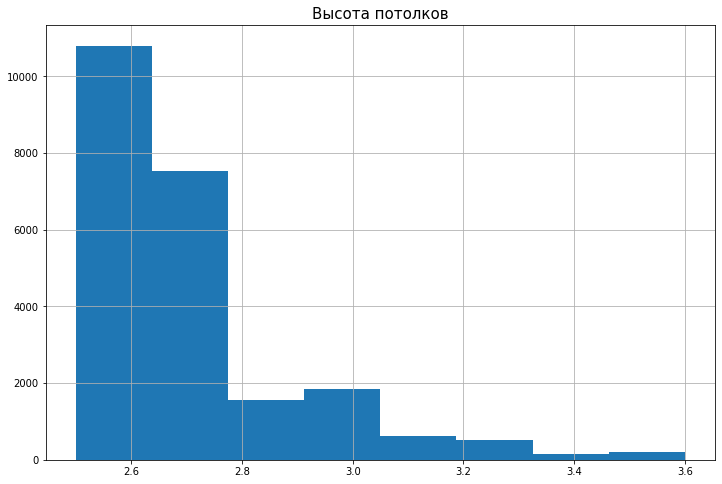

In [41]:
df['ceiling_height'].hist(bins=8, range = (2.5, 3.6), figsize=(12,8))
plt.title('Высота потолков', fontsize=15)

Больше всего квартир с высотой потолков 2.5 - 2.7 метров. остальных высот мменьше 2х тысяч обявлений

In [42]:
print('Самый долгий срок продажи')
print(df['days_exposition'].sort_values(ascending=False).head(10))

Самый долгий срок продажи
18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
6691     1512.0
20969    1512.0
14093    1497.0
15313    1489.0
19123    1485.0
11955    1484.0
Name: days_exposition, dtype: float64


In [43]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [44]:
#np.percentile(df['days_exposition'], [99])
df['days_exposition'].quantile(0.99)
#вероятнее всего из-за пустых значений не работает процентиль

1067.1399999999994

99й квантиль определил значение в 1067 дней, 20 000 дней это выброс, вероятнее всего либо объявление забыли снять с публикации либо цену сильно завысили

Text(0.5, 1.0, 'Дней продажи квартиры')

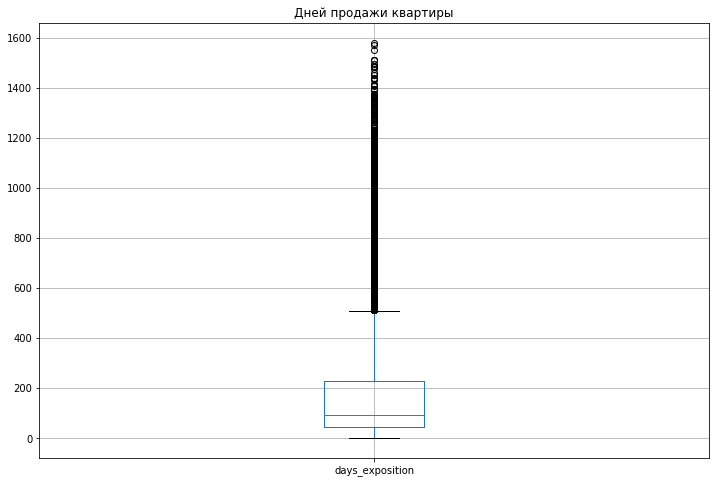

In [45]:
df.boxplot('days_exposition', figsize=(12,8)).set_title('Дней продажи квартиры')

Text(0.5, 1.0, 'Дней продажи квартиры')

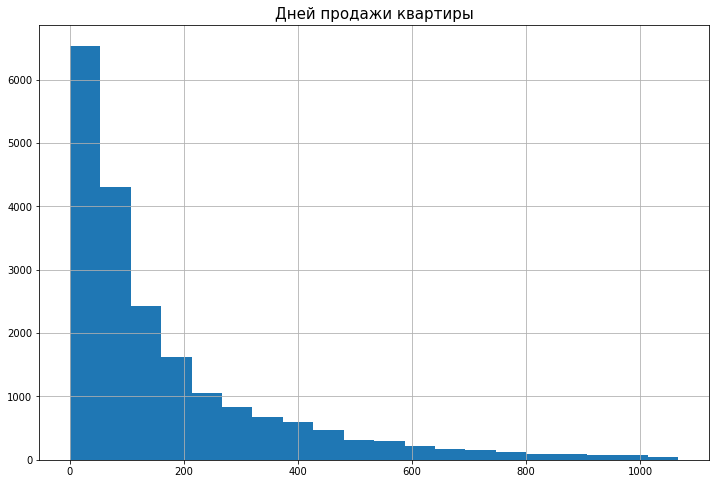

In [46]:
df['days_exposition'].hist(bins=20, range = (0, 1067), figsize=(12,8))
plt.title('Дней продажи квартиры', fontsize=15)

Больше всего квартир продается в первые 50-100 дней, т.е. 3 месяца. Остальные объявления продаются на много дольше. Так же существуют фейковые объявления, которые выставляются для рекламы риелторов или же для исскуственного завышения квартир, такие объявления висят в продаже вечность.

# Вывод
total_area
средняя площадь - 60
медиана - 52
минимальная площадь - 12
и с помощью 99 квантиля определили значение в 198 (округлили до 200 кв метров), свыше этого значения считаем выбросами

last_price
среднее 6,5
медиана 4,6
минимальнрое 12 190
и с помощью 99 квантиля определили значение в 36 млн, свыше этого значения считаем выбросами

rooms
среднее - 2
медиана - 2
минимальное - 0 (вероятнее всего это студии)
и с помощью 99 квантиля определили значение в 5 комнат, свыше этого значения считаем выбросами

ceiling_hight
среднее - 2.7
медиана - 2.6
минимальное - c с помощью 1 квантиля определили значение в 2,5, т.к. потолки высотой 1 метр не реальны
и с помощью 99 квантиля определили значение в 3,6, свыше этого значения считаем выбросами

days_exposition
среднее - 180
медиана - 95
минимальное - 1
и с помощью 99 квантиля определили значение в 1067, свыше этого значения считаем выбросами

In [47]:
#скорректируем датафрейм под наши выводы
df_filtered = df.query('(total_area <= 200)'
                       'and (300000 <= last_price <= 36000000)'
                       'and (rooms <= 5)'
                       'and (2.5 <= ceiling_height <= 3.6)'
                       'and (days_exposition <= 1067)')

In [48]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19666 entries, 1 to 23697
Data columns (total 29 columns):
total_images            19666 non-null int64
last_price              19666 non-null int64
total_area              19666 non-null float64
first_day_exposition    19666 non-null datetime64[ns]
rooms                   19666 non-null int64
ceiling_height          19666 non-null float64
floors_total            19666 non-null int64
living_area             19666 non-null float64
floor                   19666 non-null int64
is_apartment            19666 non-null bool
studio                  19666 non-null bool
open_plan               19666 non-null bool
kitchen_area            19666 non-null float64
balcony                 19666 non-null int64
locality_name           19666 non-null object
airports_nearest        15094 non-null float64
cityCenters_nearest     15113 non-null float64
parks_around3000        19666 non-null int64
parks_nearest           6461 non-null float64
ponds_around3000

# Факторы, влияющие на стоимость квартиры

In [49]:
df_filtered['total_area'].corr(df_filtered['last_price'])
#Корреляция 0,77 говорит о высчокой зависимости цены от площади

0.7728456309343917

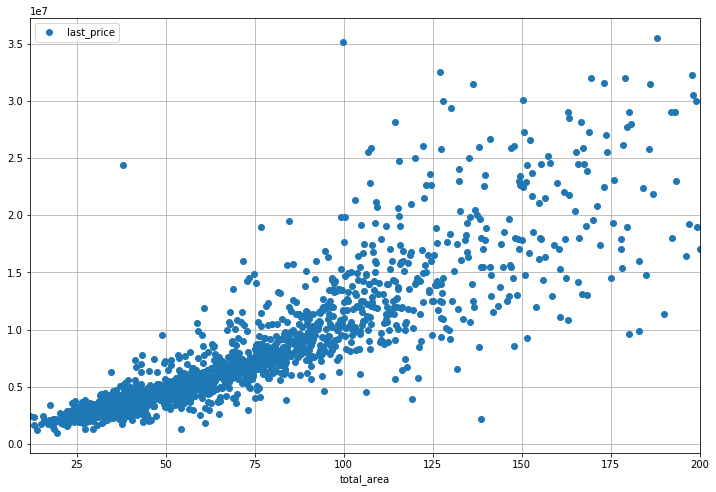

In [50]:
#зависит ли цена от площади
(
    df_filtered.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(12, 8))
)
plt.show()
#На диаграмме видно что в большинстве случаев чем больше площзадь тем больше цена

In [51]:
df_filtered['rooms'].corr(df_filtered['last_price'])
#Корреляция составляет 0,47, что не так выявлено из-за студий

0.4755828301702576

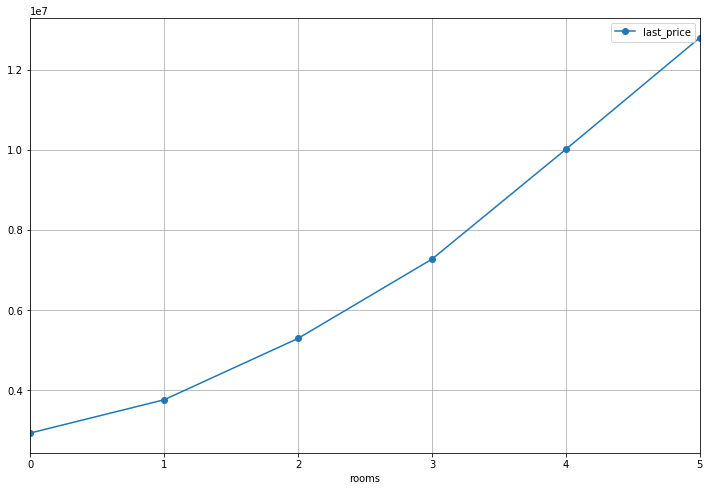

In [52]:
(
    df_filtered.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(12, 8))
)
plt.show()
#Отношение количества комнат к стоимости имеется, но менее очевидное

In [53]:
df_filtered['cityCenters_nearest'].corr(df_filtered['last_price'])
#Корреляция отрицательная, значит при удалении от центра цена снижается

-0.33561810686490273

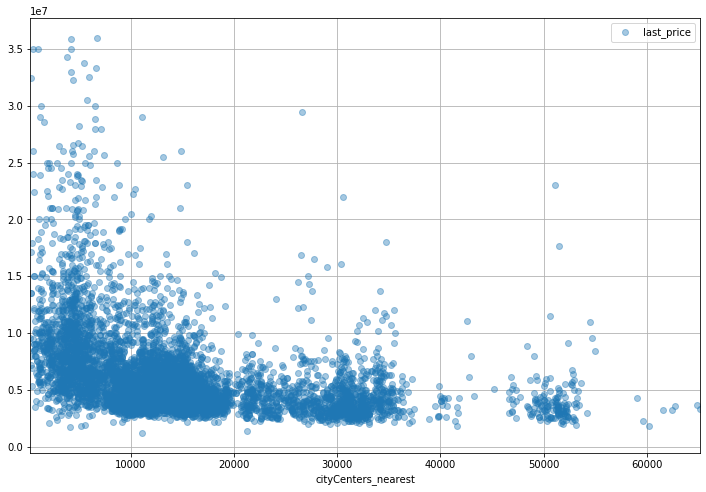

In [54]:
(
    df_filtered.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o',alpha=0.4, figsize=(12, 8))
)
plt.show()
#Зависимость есть, но не так явно выявлена

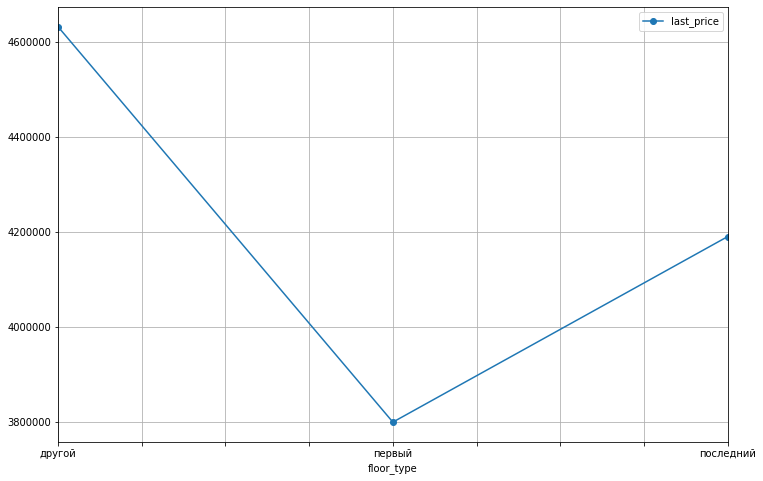

In [55]:
(
    df_filtered.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(12, 8))
)
plt.show()

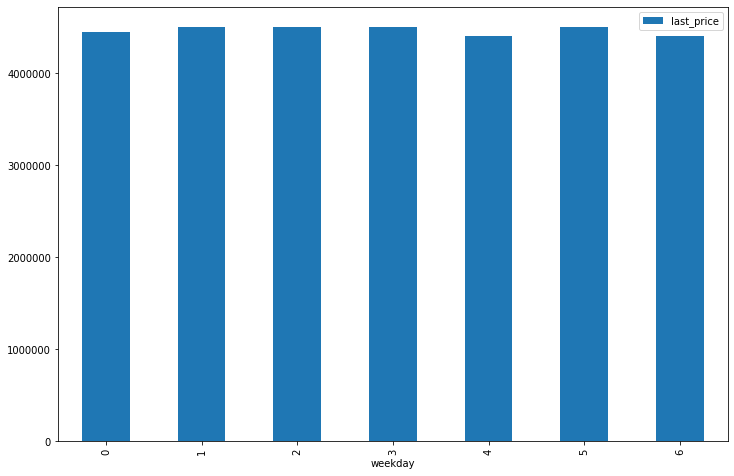

In [56]:
df_filtered.pivot_table(index ='weekday', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()
#Как таковой, зависимости нет от продажи в конкретный день недели

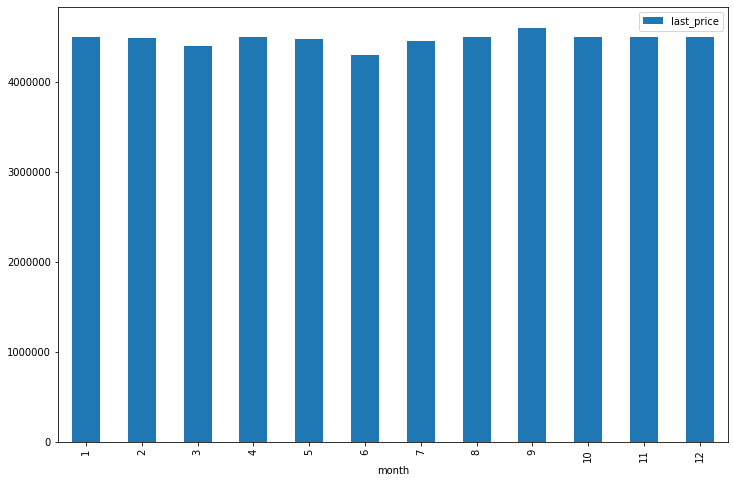

In [57]:
df_filtered.pivot_table(index ='month', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()
#Дешевле всего квартиры именно в декабре, дороже всего в сентябре

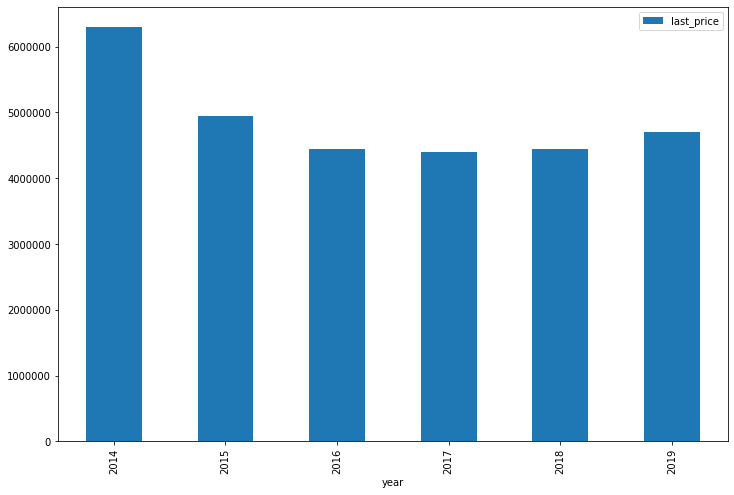

In [58]:
df_filtered.pivot_table(index ='year', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()
#Есть большие изменения в стоимости в зависимости от года продажи

## Вывод
- Больше всего влияет на стоимость площадь квартиры
- Количество комнат влияет на стоиость
- Расстояние до центра влияет на стоимость, но не так очевидно как площадь
- Этаж квартиры влияет на стоимость, самые дешевые - 1е этажи, потом идут последние этажи, а дороже всего - остальные
- День недели не влияет на стоимость
- Месяц продажи влияет на стоимость, дороже всего квартиры в сентябре, дешевле всего в декабре
- Год продажи влияет на стоимость, дороже всего квартиры были в 2014году

In [59]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
top_city = df_filtered['locality_name'].value_counts().head(10)
city_sm_price = df_filtered.query('locality_name in (@top_city.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)
#Самая дорогая стоимость квадратного метра, как и ожидалось, в СПБ, затем идет Пушкин (исторический город, с большим кол-вом 
#архитектуры и памятников, вероятнее всего из-за исторической значимости такая и цена)

,sm_price
locality_name,
Санкт-Петербург,108853
Пушкин,101506
деревня Кудрово,92419
посёлок Парголово,89681
посёлок Мурино,85774
посёлок Шушары,77798
Колпино,74719
Всеволожск,68472
Гатчина,67938


In [60]:
# код ревьюера
df_filtered['center_distance'] = round(df_filtered['cityCenters_nearest'] / 1000)

df_filtered[df_filtered['center_distance'] == 0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type,living_ratio,kitchen_ratio,center_distance
1934,18,9590000,108.0,2017-05-23,2,3.30,5,59.000000,2,False,...,290.0,69.0,88796,1,5,2017,другой,54,10,0.0
2291,6,27000000,173.6,2015-06-11,5,3.30,5,125.500000,4,False,...,562.0,388.0,155529,3,6,2015,другой,72,8,0.0
2609,20,7200000,80.0,2017-08-24,3,2.80,4,43.000000,1,False,...,516.0,11.0,90000,3,8,2017,первый,53,10,0.0
2988,2,5300000,49.0,2016-11-09,3,3.00,3,30.000000,3,False,...,305.0,232.0,108163,2,11,2016,последний,61,14,0.0
3800,12,6900000,47.6,2015-07-22,2,2.60,5,28.200000,5,False,...,142.0,398.0,144957,2,7,2015,последний,59,17,0.0
8239,10,13500000,96.9,2018-08-06,3,3.20,7,67.300000,3,False,...,657.0,14.0,139318,0,8,2018,другой,69,15,0.0
8677,15,13500000,98.0,2017-12-19,3,3.50,5,46.000000,3,False,...,222.0,35.0,137755,1,12,2017,другой,46,22,0.0
9488,3,8000000,106.0,2018-07-26,3,3.40,4,61.153846,1,False,...,38.0,60.0,75471,3,7,2018,первый,57,17,0.0
11723,18,32500000,127.1,2015-01-15,3,3.40,6,56.200000,2,False,...,569.0,725.0,255704,3,1,2015,другой,44,40,0.0
12556,3,17900000,162.2,2017-10-16,5,3.60,5,101.000000,3,False,...,516.0,380.0,110357,0,10,2017,другой,62,13,0.0


In [61]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
#df_filtered['center_distance'] = df_filtered['cityCenters_nearest'] / 1000

df_filtered['center_distance'] = round(df_filtered['cityCenters_nearest'] / 1000)
df_filtered = df_filtered.query('center_distance > 0')
display(df_filtered['center_distance'].head())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1    19.0
2    14.0
4     8.0
6    19.0
9    15.0
Name: center_distance, dtype: float64

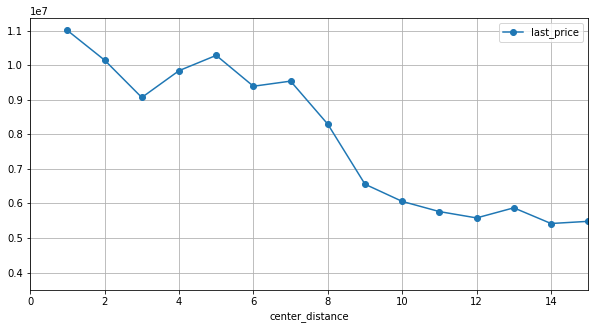

In [62]:
# Выбираем Санкт-Петербург, строим график зависимости цены от удаленности от центра

(
    df_filtered.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_distance', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()
#происходит резкий спад на 8и км, будем считать центром все до 8и км.

In [63]:
#Выделяем сегмент квартир в центре СПБ
df_spb_center = df_filtered.query('(locality_name == "Санкт-Петербург") & (center_distance <= 8)') 
df_spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type,living_ratio,kitchen_ratio,center_distance
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000,1,6,2018,другой,32,41,8.0
24,8,6500000,97.2,2015-10-31,2,3.00,3,46.5,1,False,...,124.0,265.0,66872,5,10,2015,первый,47,20,2.0
35,6,15500000,149.0,2017-06-26,5,2.60,5,104.0,4,False,...,779.0,644.0,104026,0,6,2017,другой,69,11,4.0
61,18,7990000,74.0,2017-08-24,2,3.00,4,43.0,4,False,...,NaN,609.0,107972,3,8,2017,последний,58,27,4.0
63,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,779.0,37.0,169491,1,9,2018,другой,57,13,5.0


In [64]:
#не правильно прочитал задание, сначала считал все по отношению ко всему датасету, а надо к спб, собзал преременную
df_spb =  df_filtered.query('locality_name == "Санкт-Петербург"') 
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type,living_ratio,kitchen_ratio,center_distance
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,574.0,558.0,92785,3,8,2015,другой,61,14,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000,1,6,2018,другой,32,41,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,289.0,88524,6,2,2017,другой,71,10,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,553.0,137.0,127525,3,11,2017,другой,51,21,14.0
15,16,4650000,39.0,2017-11-18,1,2.60,14,20.5,5,False,...,296.0,19.0,119230,5,11,2017,другой,52,19,14.0


##### "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

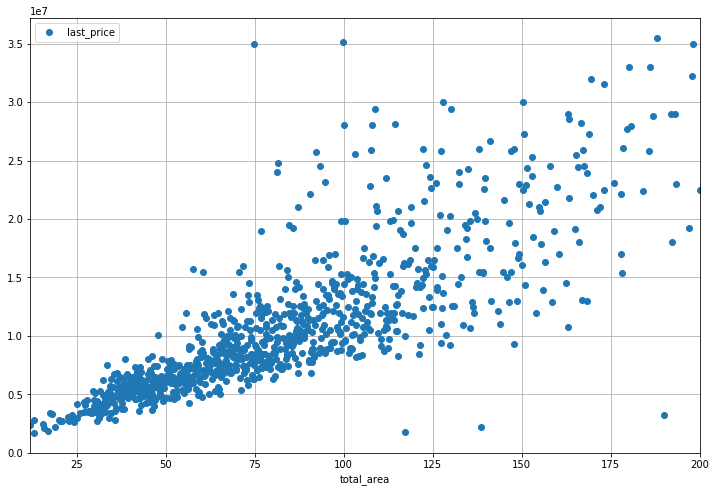

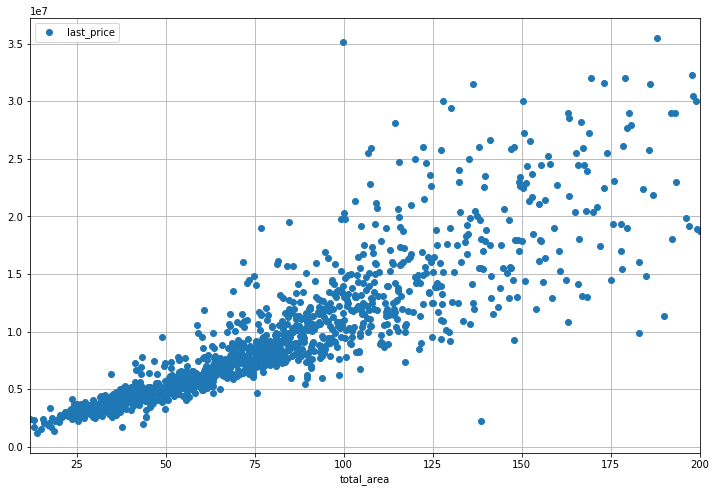

In [65]:
#Зависимость площади на стоимость
(
    df_spb_center.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(12, 8))
)
plt.show()
(
    df_spb.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(12, 8))
)
plt.show()

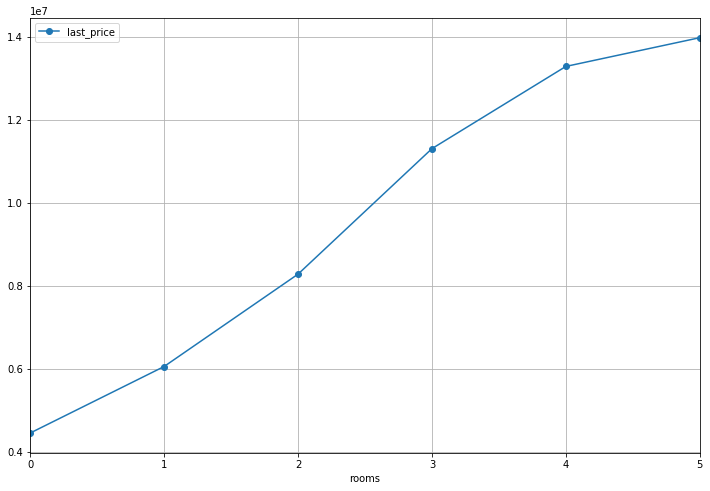

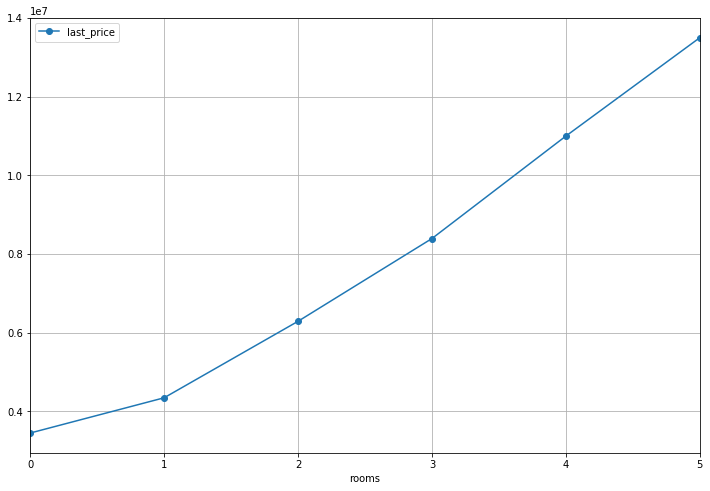

In [66]:
(
    df_spb_center.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(12, 8))
)
plt.show()
(
    df_spb.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(12, 8))
)
plt.show()

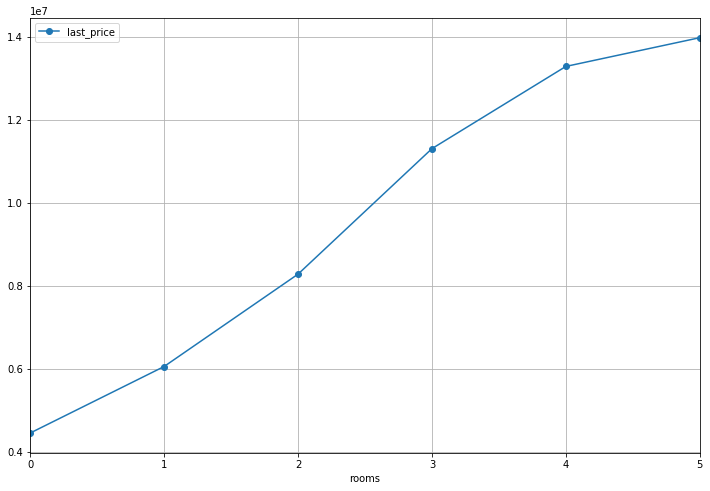

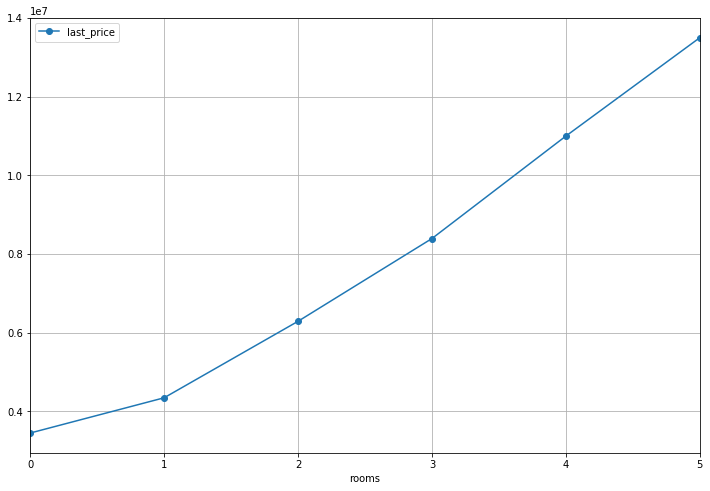

In [67]:
#Зависимость числа комнат на стоимость квартиры
(
    df_spb_center.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(12, 8))
)
plt.show()
(
    df_spb.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(12, 8))
)
plt.show()

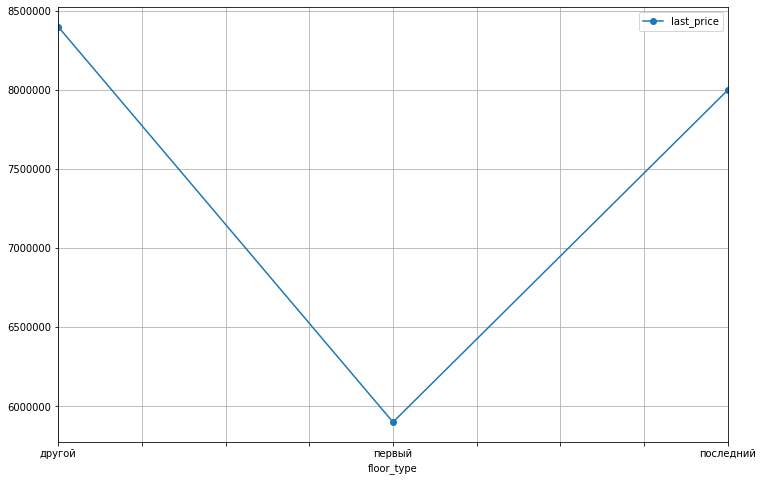

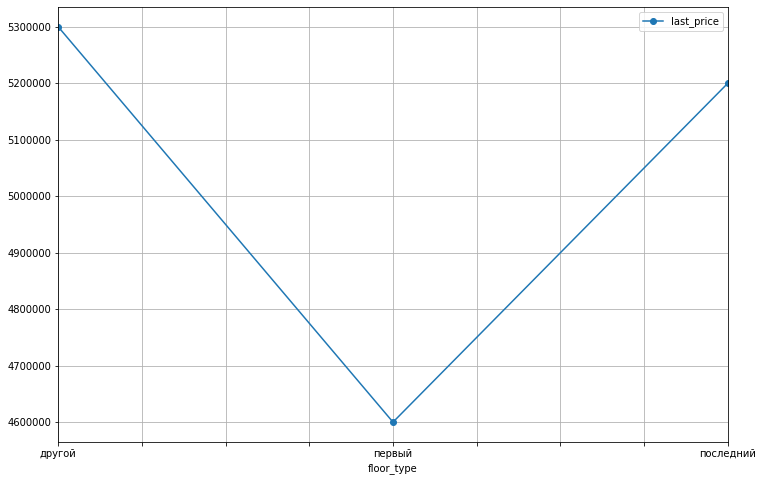

In [68]:
#Зависимость этажа на стоимость квартиры
(
    df_spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(12, 8))
)
plt.show()
(
    df_spb.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(12, 8))
)
plt.show()

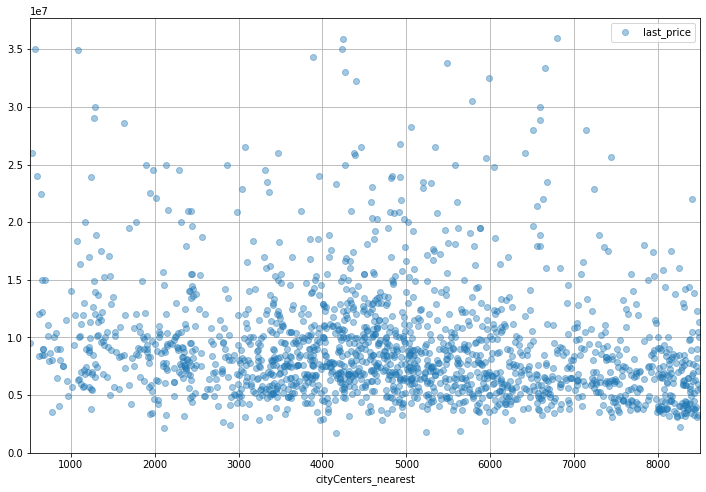

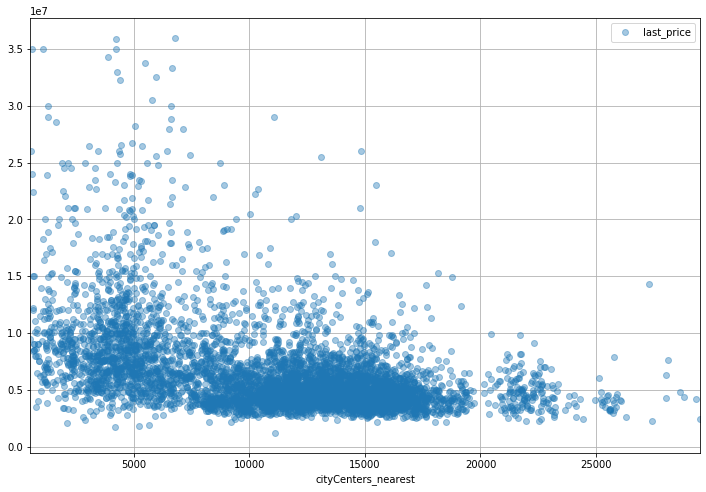

In [69]:
#Зависимость удаленности от центра на стоимость
(
    df_spb_center.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o',alpha=0.4, figsize=(12, 8))
)
plt.show()
(
    df_spb.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o',alpha=0.4, figsize=(12, 8))
)
plt.show()

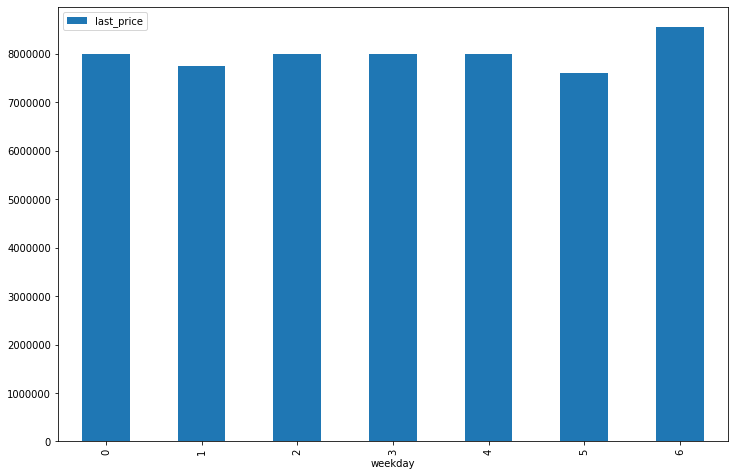

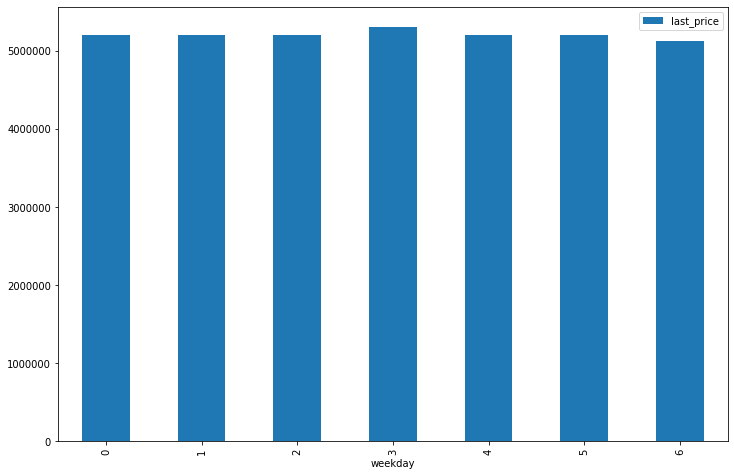

In [70]:
#Дата размещения объявления по дням

df_spb_center.pivot_table(index ='weekday', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()

df_spb.pivot_table(index ='weekday', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()

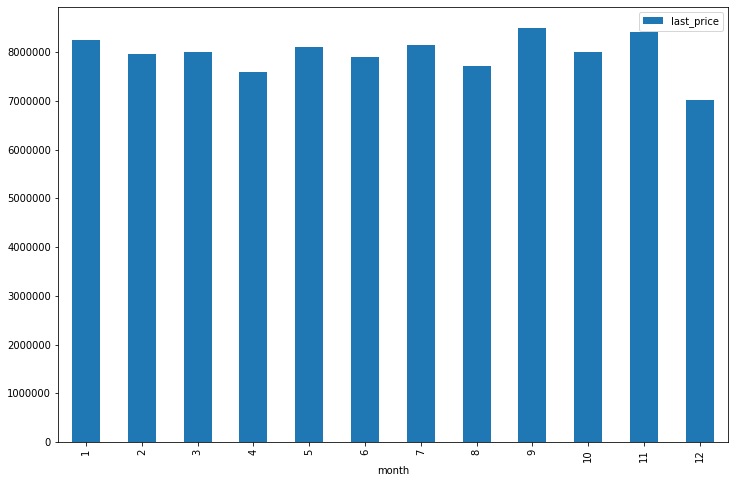

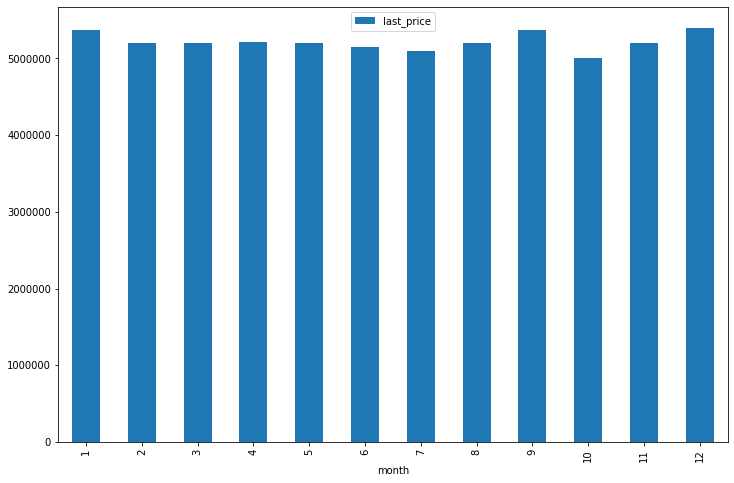

In [71]:
#Дата размещения объявления по месяцам
df_spb_center.pivot_table(index ='month', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()
df_spb.pivot_table(index ='month', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()

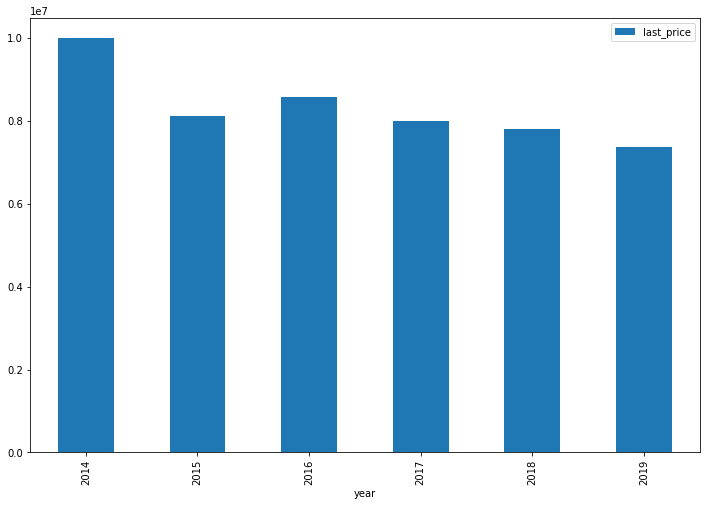

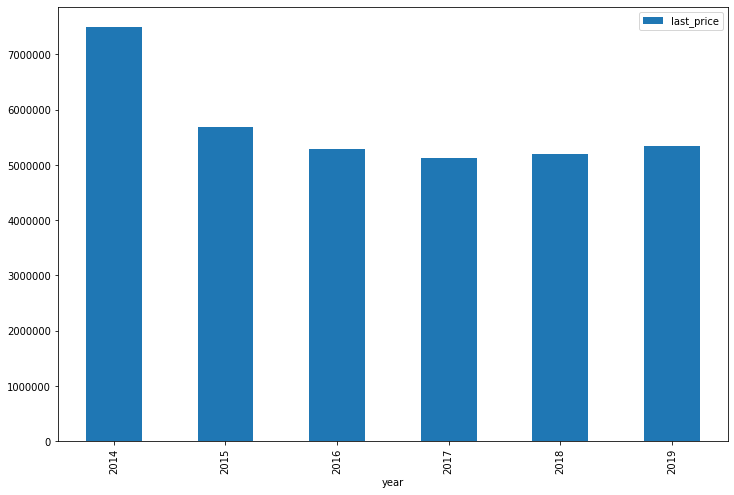

In [72]:
#Дата размещения объявления по годам
df_spb_center.pivot_table(index ='year', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()
df_spb.pivot_table(index ='year', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.show()

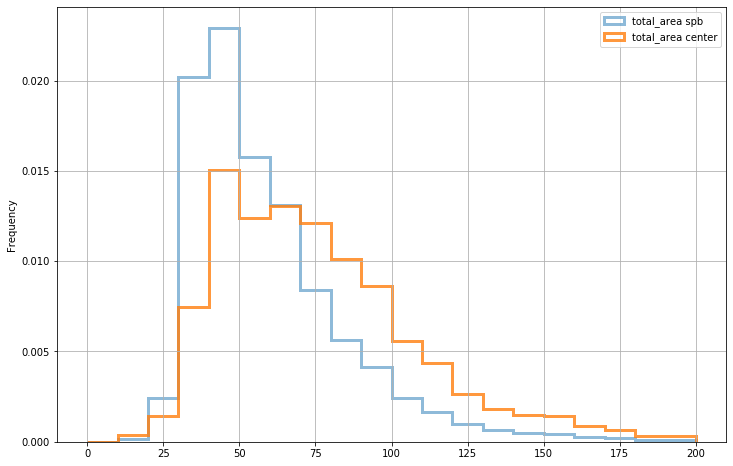

In [73]:
#анализ распределения площади
ax = df_spb.plot(kind = 'hist', y = 'total_area', histtype = 'step', bins = 20, range = (0, 200),
            alpha = 0.5, linewidth = 3, grid = True, density = True, figsize=(12,8), label = 'total_area' + ' spb')
df_spb_center.plot(kind = 'hist', y = 'total_area', histtype = 'step', ax = ax, linewidth = 3,
                   bins = 20, range = (0, 200), alpha = 0.8, grid = True, density = True, figsize=(12,8),
                   label = 'total_area' + ' center')

Сделали сравнительную гистограмму, в ней показано что в центре средняя площадь квартит составляет 40-50 кв метров, и больше квартир с площадью больше 70 кв метров

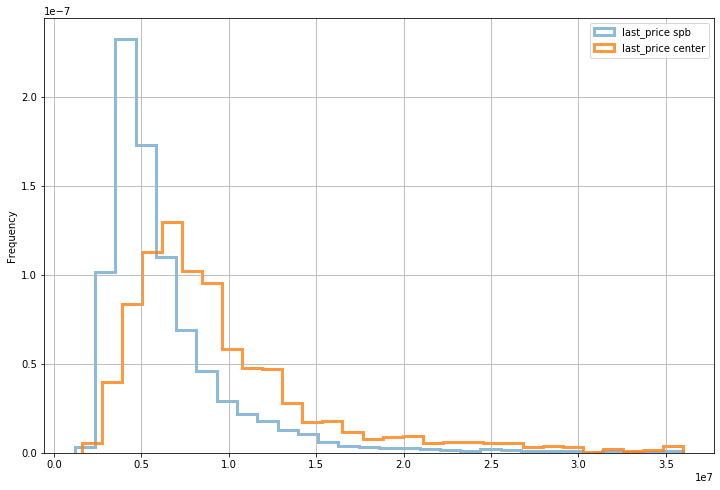

In [74]:
#анализ распределения цены
ax = df_spb.plot(kind = 'hist', y = 'last_price', histtype = 'step', bins = 30, 
                 alpha = 0.5, linewidth = 3, grid = True, density = True, figsize=(12,8), label = 'last_price' + ' spb')
df_spb_center.plot(kind = 'hist', y = 'last_price', histtype = 'step', ax = ax, linewidth = 3,
                   bins = 30, alpha = 0.8, grid = True, density = True, figsize=(12,8),
                   label = 'last_price' + ' center')

Сделали сравнительную гистограмму, в ней показано что цена в центре СПБ выше и средняя стоимость 7млн

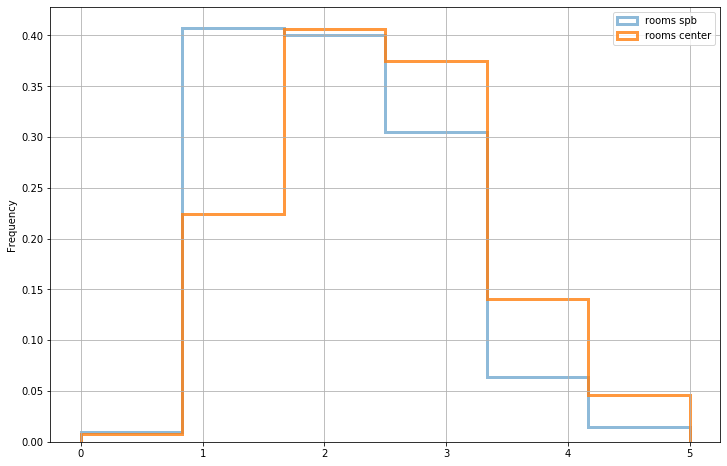

In [75]:
#Анализ числа комнат
ax = df_spb.plot(kind = 'hist', y = 'rooms', histtype = 'step', bins = 6, 
                 alpha = 0.5, linewidth = 3, grid = True, density = True, figsize=(12,8), label = 'rooms' + ' spb')
df_spb_center.plot(kind = 'hist', y = 'rooms', histtype = 'step', ax = ax, linewidth = 3,
                   bins = 6, alpha = 0.8, grid = True, density = True, figsize=(12,8),
                   label = 'rooms' + ' center')

Сравнительтная гистограмма показывает что в центре преобладают квартиры с большим числом комнат, меньше значений одн

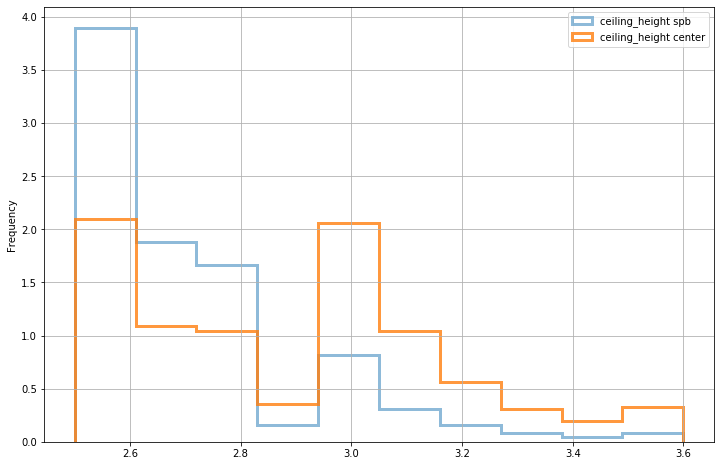

In [76]:
#Анализ высоты потолков
ax = df_spb.plot(kind = 'hist', y = 'ceiling_height', histtype = 'step', bins = 10, 
                 alpha = 0.5, linewidth = 3, grid = True, density = True, figsize=(12,8), label = 'ceiling_height' + ' spb')
df_spb_center.plot(kind = 'hist', y = 'ceiling_height', histtype = 'step', ax = ax, linewidth = 3,
                   bins = 10, alpha = 0.8, grid = True, density = True, figsize=(12,8),
                   label = 'ceiling_height' + ' center')

# Вывод
Самая дорогая недвижимость в Санкт-Петербурге
Самоя дорогая недвижимость в центре Санкт-Петербурга, определил расстояние центрального района как 8км
Площадь квартиры сильно влияет как в центре так и во всем СПБ
Отношение количества комнат в центре такое же как и в других районах, за исключением 5и комнатных, в центре разница между 4 и 5 комнатными меньше чем в окраине СПБ
Отношение этажей в центре и в окраинах одинаковое, дешевле первый этаж, за ним последний, остальные дороже всего
Стоимость не сильно разница от расстояния, т.к. в пределах этого центра выбросы происходят, вероятнее всего, из-за достопримечательностей и других особенностей местополождения квартиры
ДЛень недели не влияет на стоимость ни в центре ни в окраинах, за исключением последнего дня недели в центре
По месяцам в центре менее сбалансированно, в сентябре дороже всего
При выборке по годам разница только в 2016 году

## Общий вывод

1. В датафрейме 23699 строк и 22 столбца
2. В большей части столбцов были пропущеные значения
3. В предобработке:
 переведен в тип даты столбец first_day_exposition
 заменены на 0 пропущенные значения в столбцах floors_total, locality_name
 в целочисленные переведены столбца: total_images, floors_total, balcony,last_price 

 Добавлены столбцы: стоимость кв метра, день, месяц, год продажи, тип этажа, отношение жилой площади и кухни ко всей площади
 Исследованны отношение стоимости к: площади(корреляция 0,77), количеству комнат(корреляция 0,47), расстоянию до центра (корреляция -0,33), типу этажа, дню, месяцу и году продажи.
 Больше всего на стоимосчть влияет площапдь квартиры. Так же год продажи очень влияет, самая большая стоимость была в 2014году.

Самая большая стоимость квартир в Санкт-Петербурге. 
Выявлен центральный район с радиусом в 8км, где самая большая стоимость квартир.
В нем так же больше всего влияет площадь квартиры и так же пик стоимостей был в 2014году.
